# Data Science Research Methods Report-2

## **Introduction**<br>
The PAMAP2 Physical Activity Monitoring dataset (available here) contains data from 9 participants who participated in 18 various physical activities (such as walking, cycling, and soccer) while wearing three inertial measurement units (IMUs) and a heart rate monitor. This information is saved in separate text files for each subject. The goal is to build hardware and/or software that can determine the amount and type of physical activity performed by an individual by using insights derived from analysing the given dataset. 

In [1]:
import os
from IPython.display import display
from matplotlib import rcParams
from scipy.stats import ranksums
import numpy as np
import seaborn as sns
os.chdir("/home/sahil/Downloads/PAMAP2_Dataset/Protocol")
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning<br>
For tidying up the data :<br>
- We load the data of various subjects and give relevant column names<br>
  for various features. <br>
- The data for all subjects are then stacked together to form one table.<br>
- We remove the 'Orientation' columns because it was mentioned <br>
  in the data report that it is invalid in this data collection.<br>
- Similarly, the rows with Activity ID "0" are also removed as<br>
  it does not relate to any specific activity.<br>
- The missing values are filled up using the mean for that feature.


<br>
Given below are functions to give relevant names to the columns and create a<br>
single table containing data for all subjects<br>


In [2]:
def gen_activity_names():
    # Using this function all the activity names are mapped to their ids
    act_name = {}
    act_name[0] = 'transient'
    act_name[1] = 'lying'
    act_name[2] = 'sitting'
    act_name[3] = 'standing'
    act_name[4] = 'walking'
    act_name[5] = 'running'
    act_name[6] = 'cycling'
    act_name[7] = 'Nordic_walking'
    act_name[9] = 'watching_TV'
    act_name[10] = 'computer_work'
    act_name[11] = 'car driving'
    act_name[12] = 'ascending_stairs'
    act_name[13] = 'descending_stairs'
    act_name[16] = 'vacuum_cleaning'
    act_name[17] = 'ironing'
    act_name[18] = 'folding_laundry'
    act_name[19] = 'house_cleaning'
    act_name[20] = 'playing_soccer'
    act_name[24] = 'rope_jumping'
    return act_name
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]
def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]
def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output
def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
def load_subjects(root='/home/sahil/Downloads/PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110,1):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output
data = load_subjects()# Add your own location for the data here to replicate the code
# for eg data = load_subjects('filepath')
data = data.drop(data[data['activity_id']==0].index)# Removing rows with activity id of 0
act = gen_activity_names()
data['activity_name'] = data.activity_id.apply(lambda x:act[x])
data = data.drop([i for i in data.columns if 'orientation' in i],axis=1)# Dropping Orientation 
# columns
display(data.head())

time_stamp  activity_id  heart_rate  hand_temperature  \
2928       37.66            1         NaN            30.375   
2929       37.67            1         NaN            30.375   
2930       37.68            1         NaN            30.375   
2931       37.69            1         NaN            30.375   
2932       37.70            1       100.0            30.375   

      hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
2928                    2.21530                    8.27915   
2929                    2.29196                    7.67288   
2930                    2.29090                    7.14240   
2931                    2.21800                    7.14365   
2932                    2.30106                    7.25857   

      hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
2928                    5.58753                   2.24689   
2929                    5.74467                   2.27373   
2930                    5.82342                   2.26966   
2931                    5.89930                   2.22177   
2932                    6.09259                   2.20720   

      hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  ...  \
2928                   8.55387                   5.77143  ...   
2929                   8.14592                   5.78739  ...   
2930                   7.66268                   5.78846  ...   
2931                   7.25535                   5.88000  ...   
2932                   7.24042                   5.95555  ...   

      ankle_3D_acceleration_6_y  ankle_3D_acceleration_6_z  \
2928                   -1.76757                   0.265761   
2929                   -1.75247                   0.250816   
2930                   -1.73721                   0.356632   
2931                   -1.78264                   0.311453   
2932                   -1.75240                   0.295902   

      ankle_3D_gyroscope_x  ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  \
2928              0.002908             -0.027714              0.001752   
2929              0.020882              0.000945              0.006007   
2930             -0.035392             -0.052422             -0.004882   
2931             -0.032514             -0.018844              0.026950   
2932              0.001351             -0.048878             -0.006328   

      ankle_3D_magnetometer_x  ankle_3D_magnetometer_y  \
2928                 -61.1081                 -36.8636   
2929                 -60.8916                 -36.3197   
2930                 -60.3407                 -35.7842   
2931                 -60.7646                 -37.1028   
2932                 -60.2040                 -37.1225   

      ankle_3D_magnetometer_z   id  activity_name  
2928                 -58.3696  101          lying  
2929                 -58.3656  101          lying  
2930                 -58.6119  101          lying  
2931                 -57.8799  101          lying  
2932                 -57.8847  101          lying  

[5 rows x 44 columns]

**Note**: The procedure to replace missing values using the feature mean is performed<br>
after hypothesis testing and EDA as filling up the missing values would lead to us getting<br>
incorrect sample sizes for hypotheses testing. For Hypotheses testing the blank rows of an <br>
attribute will simply be ignored.

In [3]:
def clean_data(data): # Function for extracting clean data
    #data = data.interpolate()
    # fill all the NaN values in a column with the mean values of the column
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    return data

## Exploratory Data Analysis<br>
After labelling the data appropriately, it is randomly split into training and testing sets. <br>
In the training set, we perform Exploratory Data Analysis and come up with potential hypotheses. <br>
We then test those hypotheses on the testing set.<br>
50% of data is used for training in this case(Exploratory data analysis) and the rest for testing

In [4]:
def train_test_split(data,split_size):
    np.random.seed(5)
    msk = np.random.rand(len(data)) < split_size # This code implies 80% of the values will be True
    train = data[msk] # Generating training data
    test = data[~msk] # generating testing data  
    return train,test
train,test = train_test_split(data,0.50)

### Data Visualizations

* Boxplot of heart rate grouped by activity 

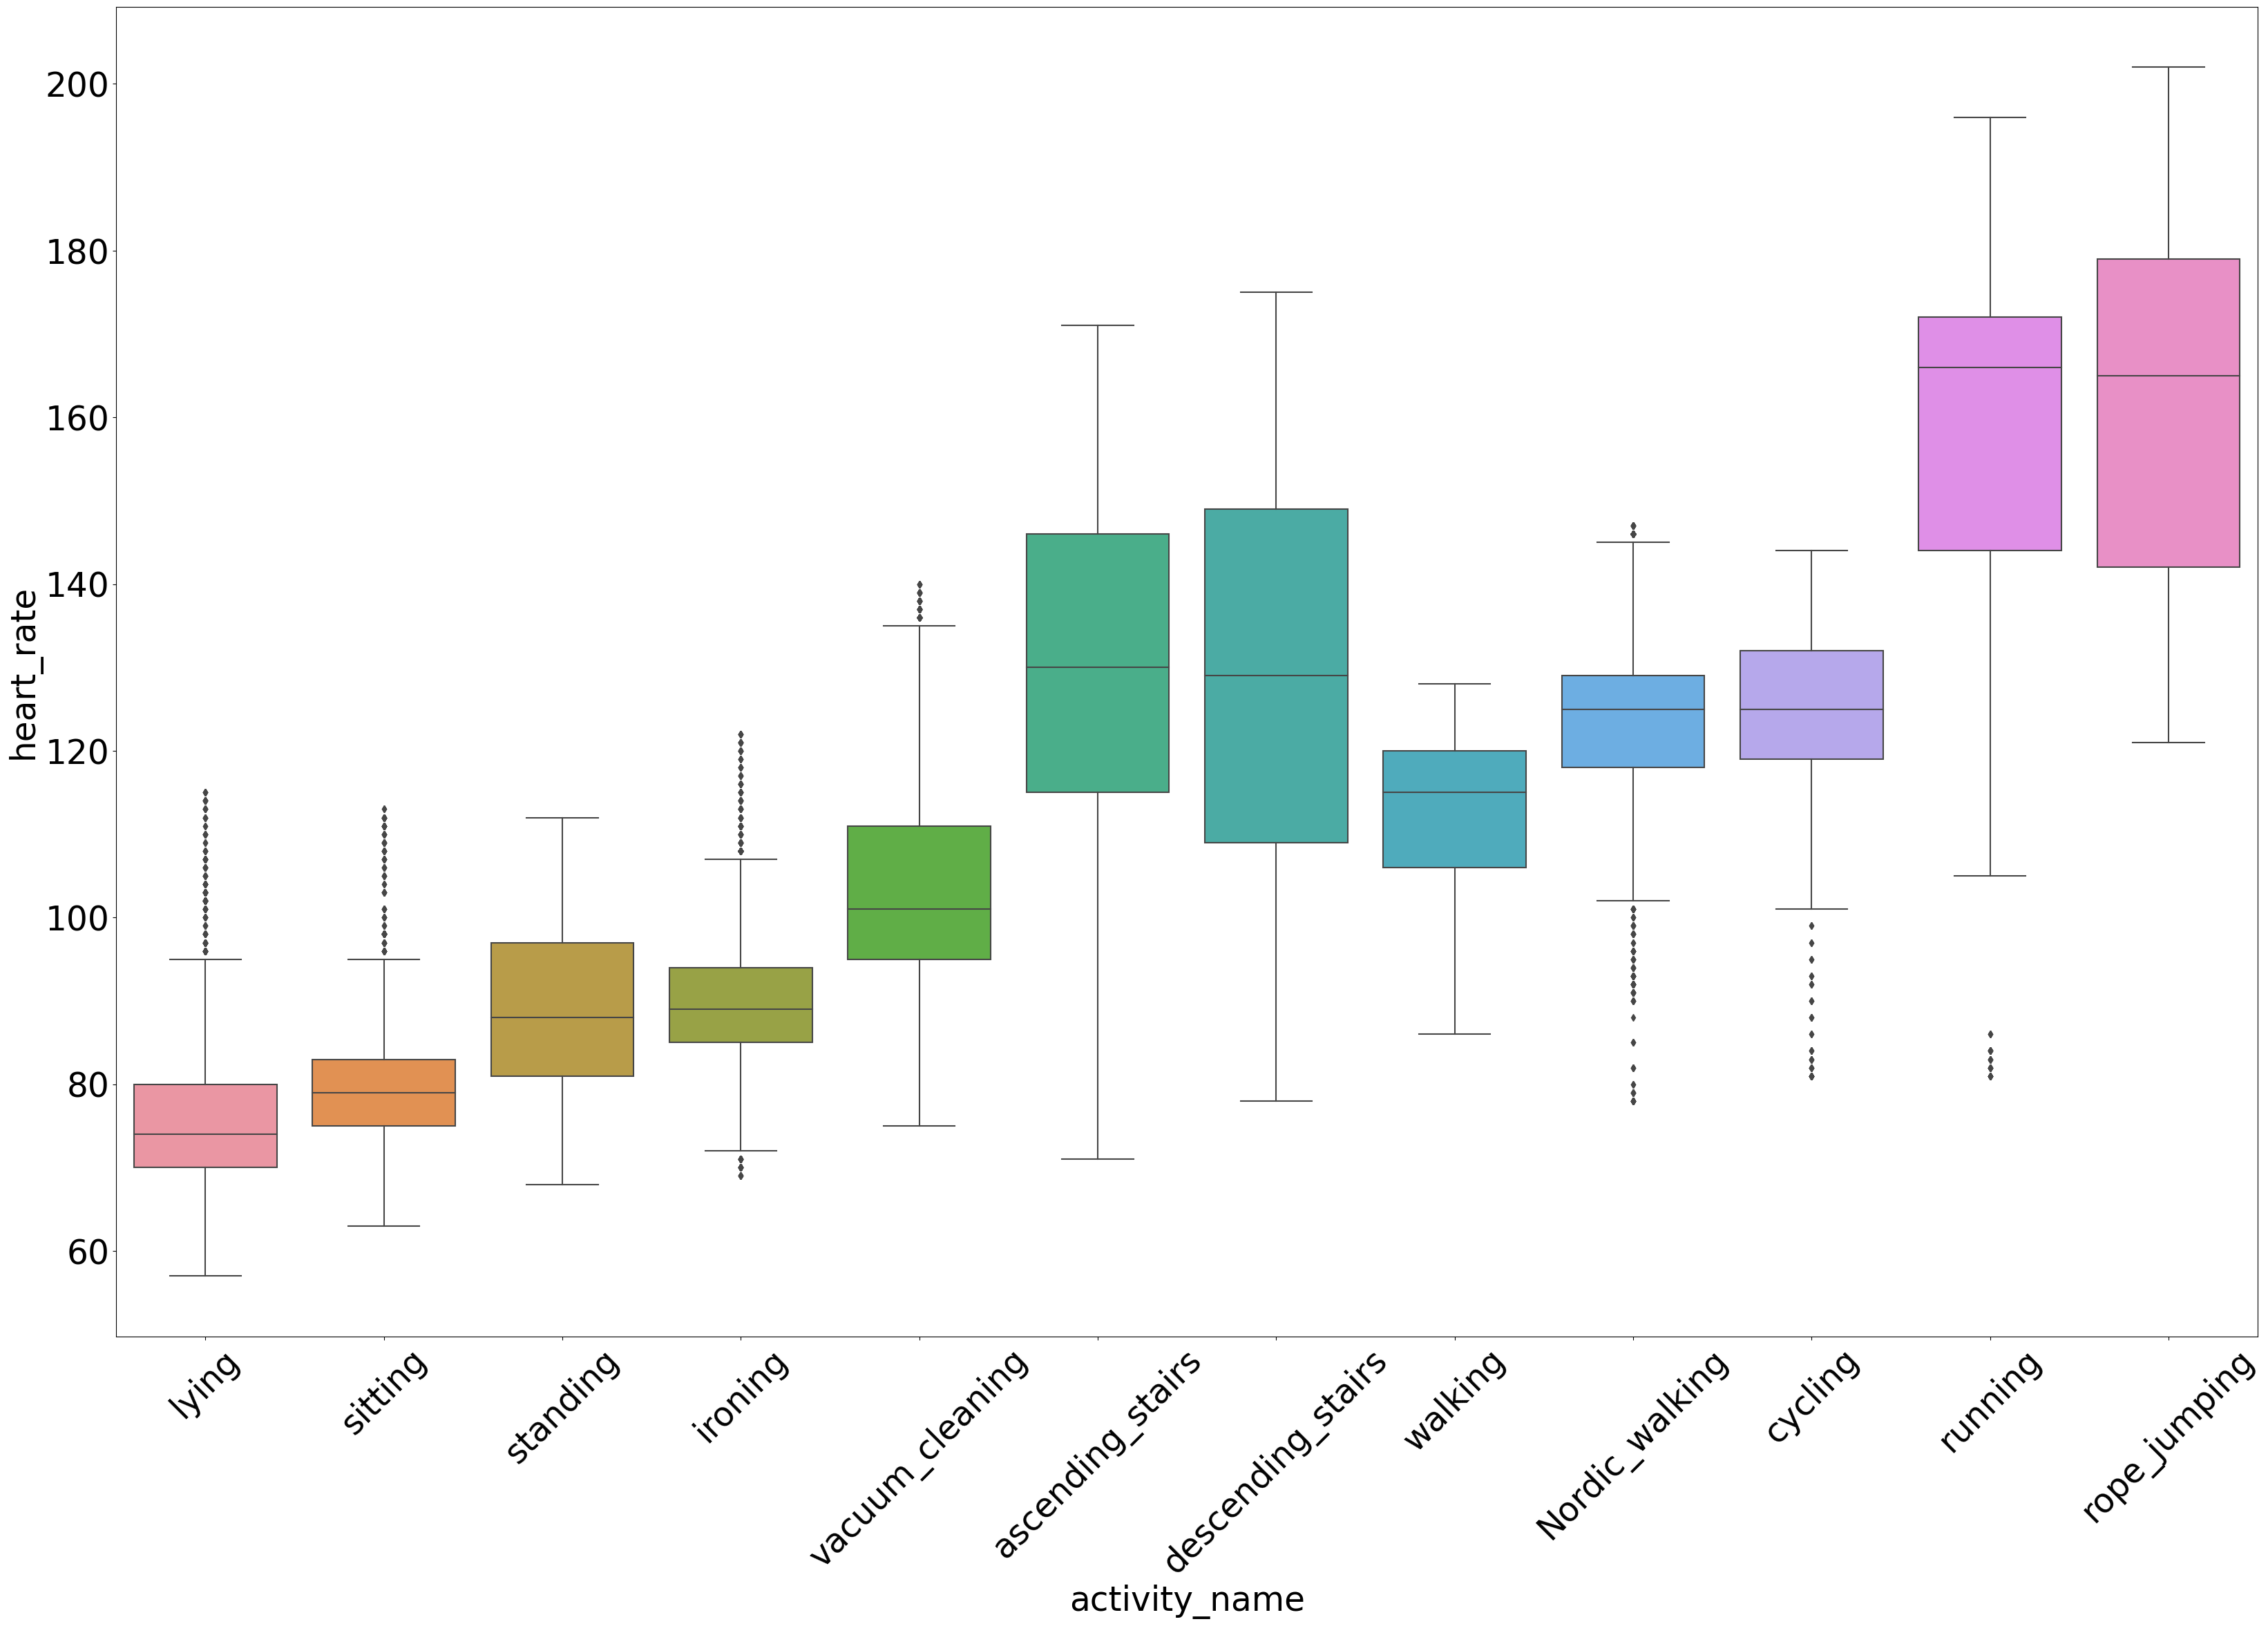

In [5]:
rcParams['figure.figsize'] = 40,25 # Setting the figure dimensions 
rcParams['font.size'] = 35 # Setting the text and number font size
ax=sns.boxplot(x="activity_name",y="heart_rate",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)# Rotating Text
plt.show()

  1. From the boxplot we can notice that activities like running and rope jumping have higher average heart rate than other activities<br>
  2. 'Nordic_walking' and 'running' have a lot of outliers on the lower side<br>
  3.  Activities like 'lying','sitting' and standing have a lot of outliers on the upper side.

* Boxplot of hand temperature grouped by activity

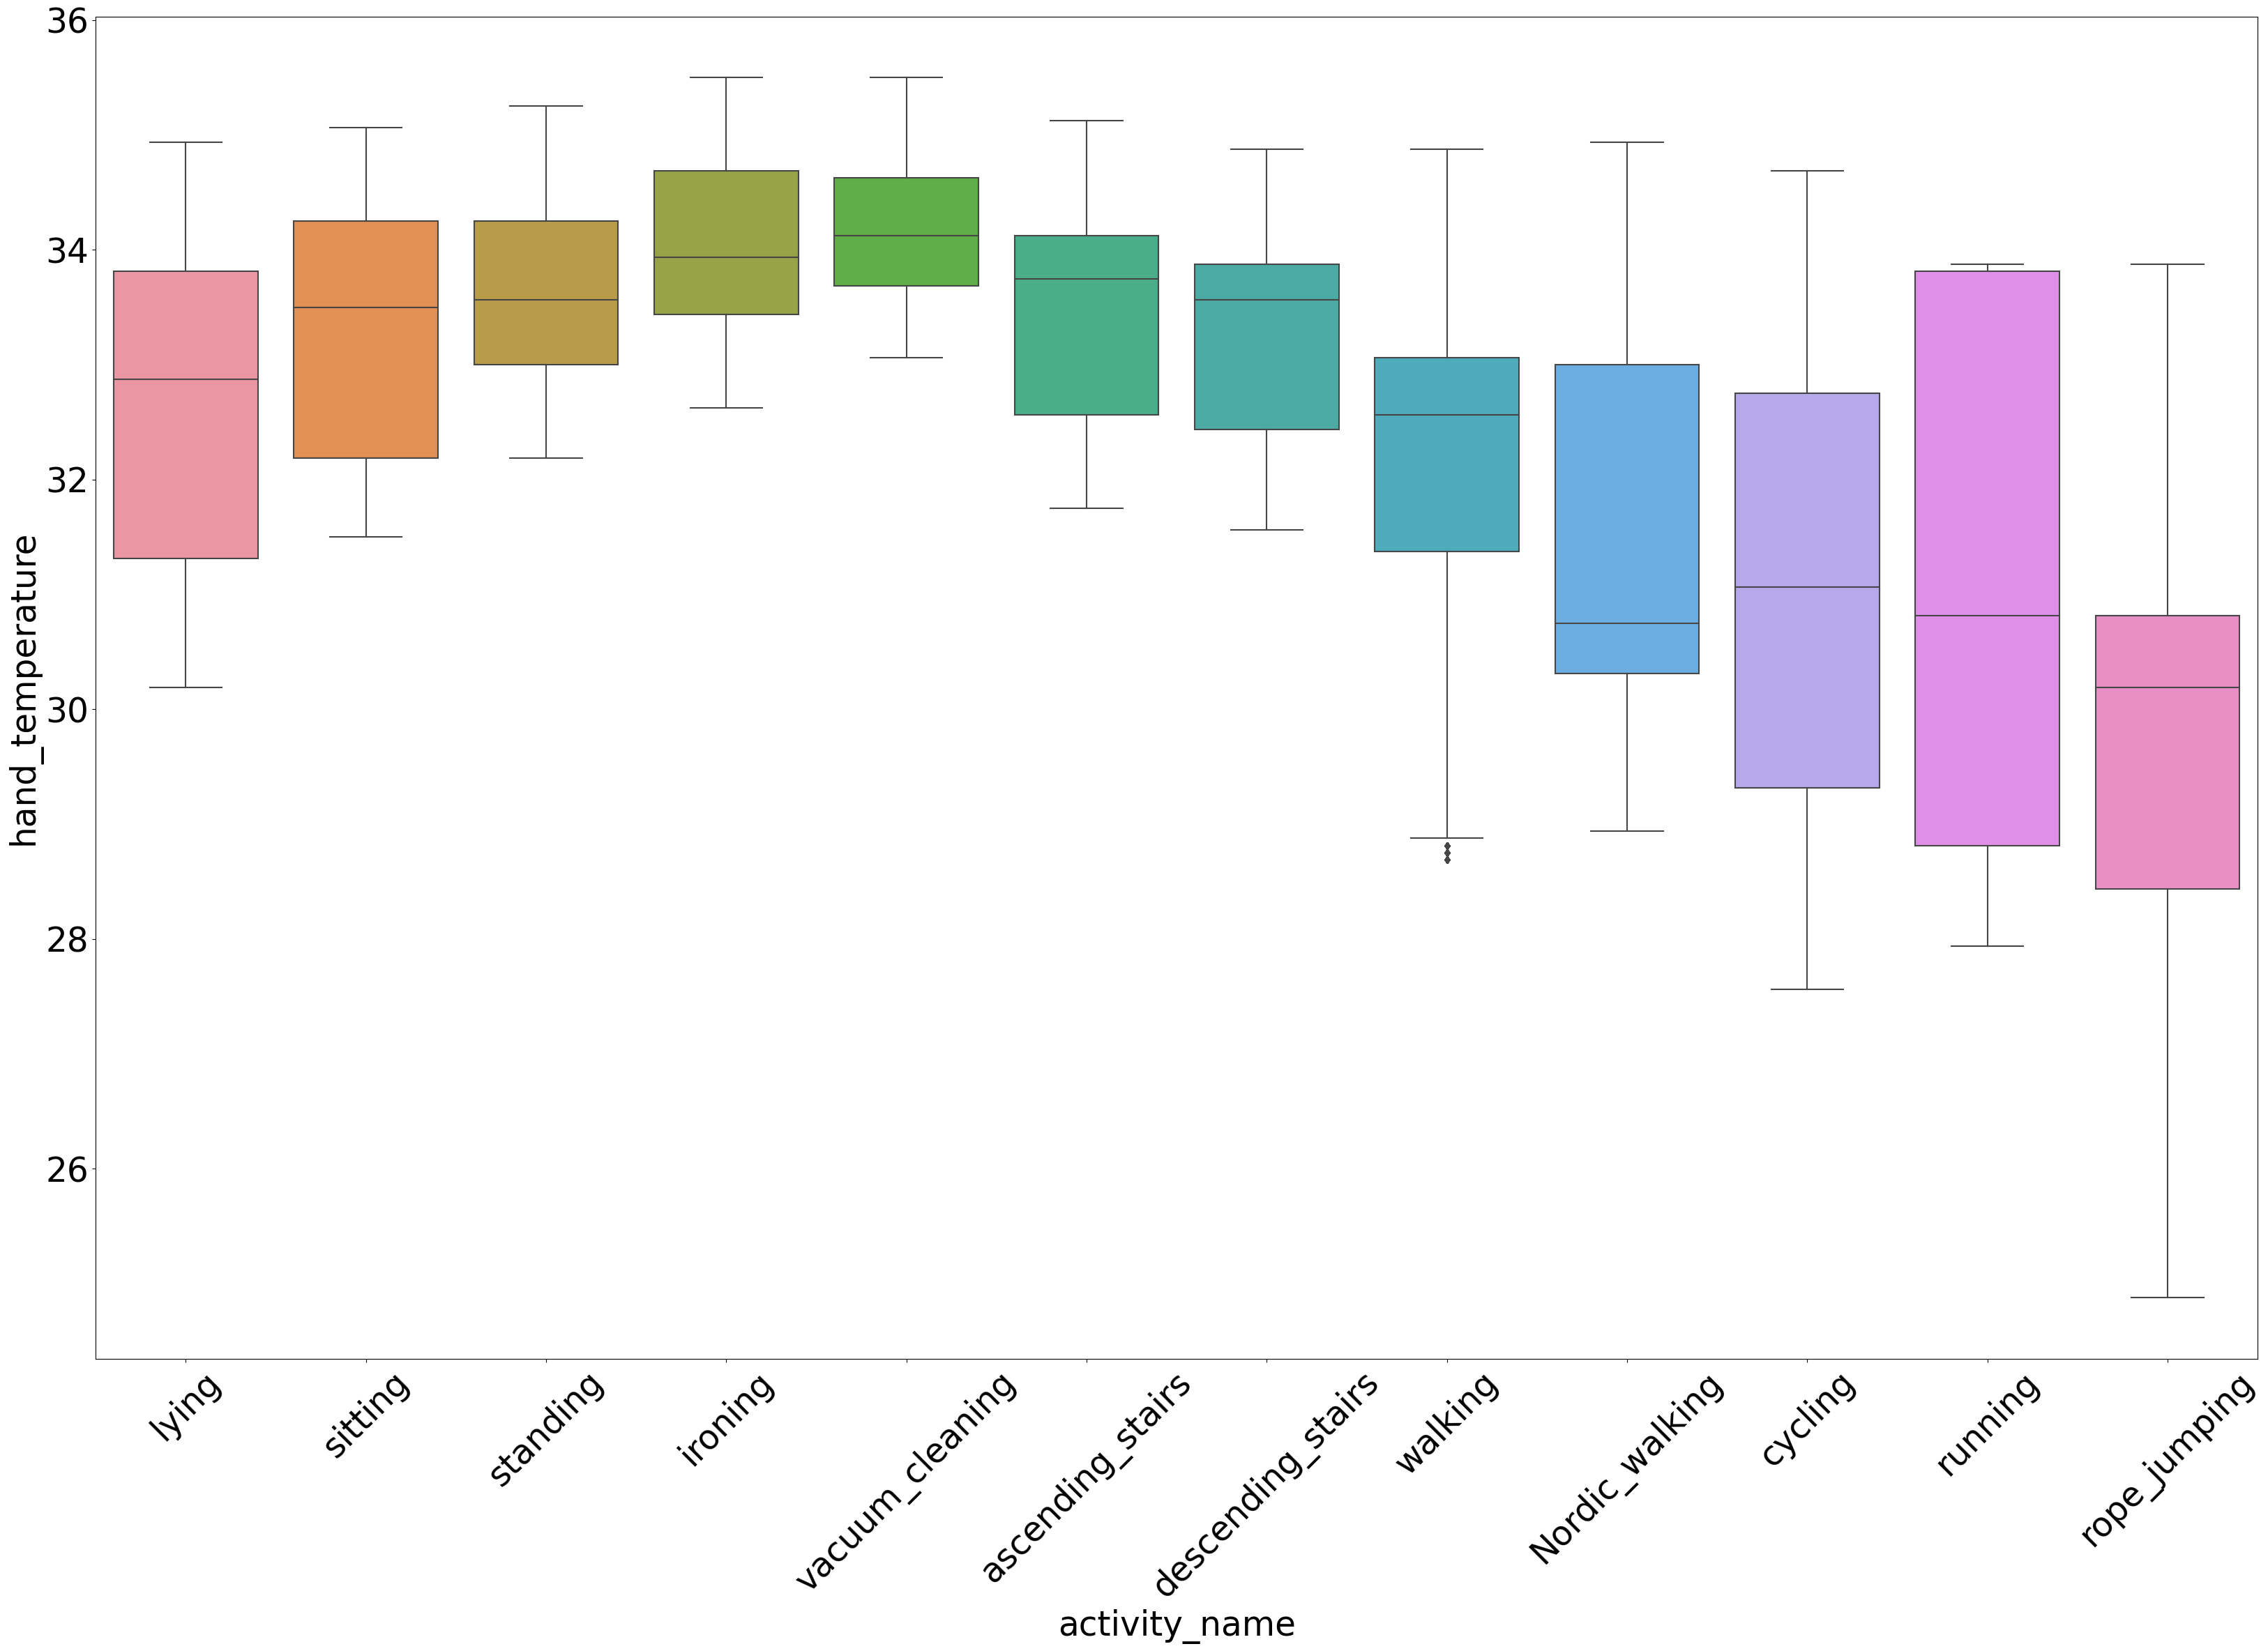

In [6]:
ax=sns.boxplot(x="activity_name",y="hand_temperature",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)# Rotating Text
plt.show()

1. "Ironing" and "vacuum_cleaning" may have higher average hand temperatures compared to other activitiies.<br>
2. "Lying" and "standing" have outliers on the upper side while "ascending_stairs" has it on the lower side.

* Boxplot of ankle temperature grouped by activity

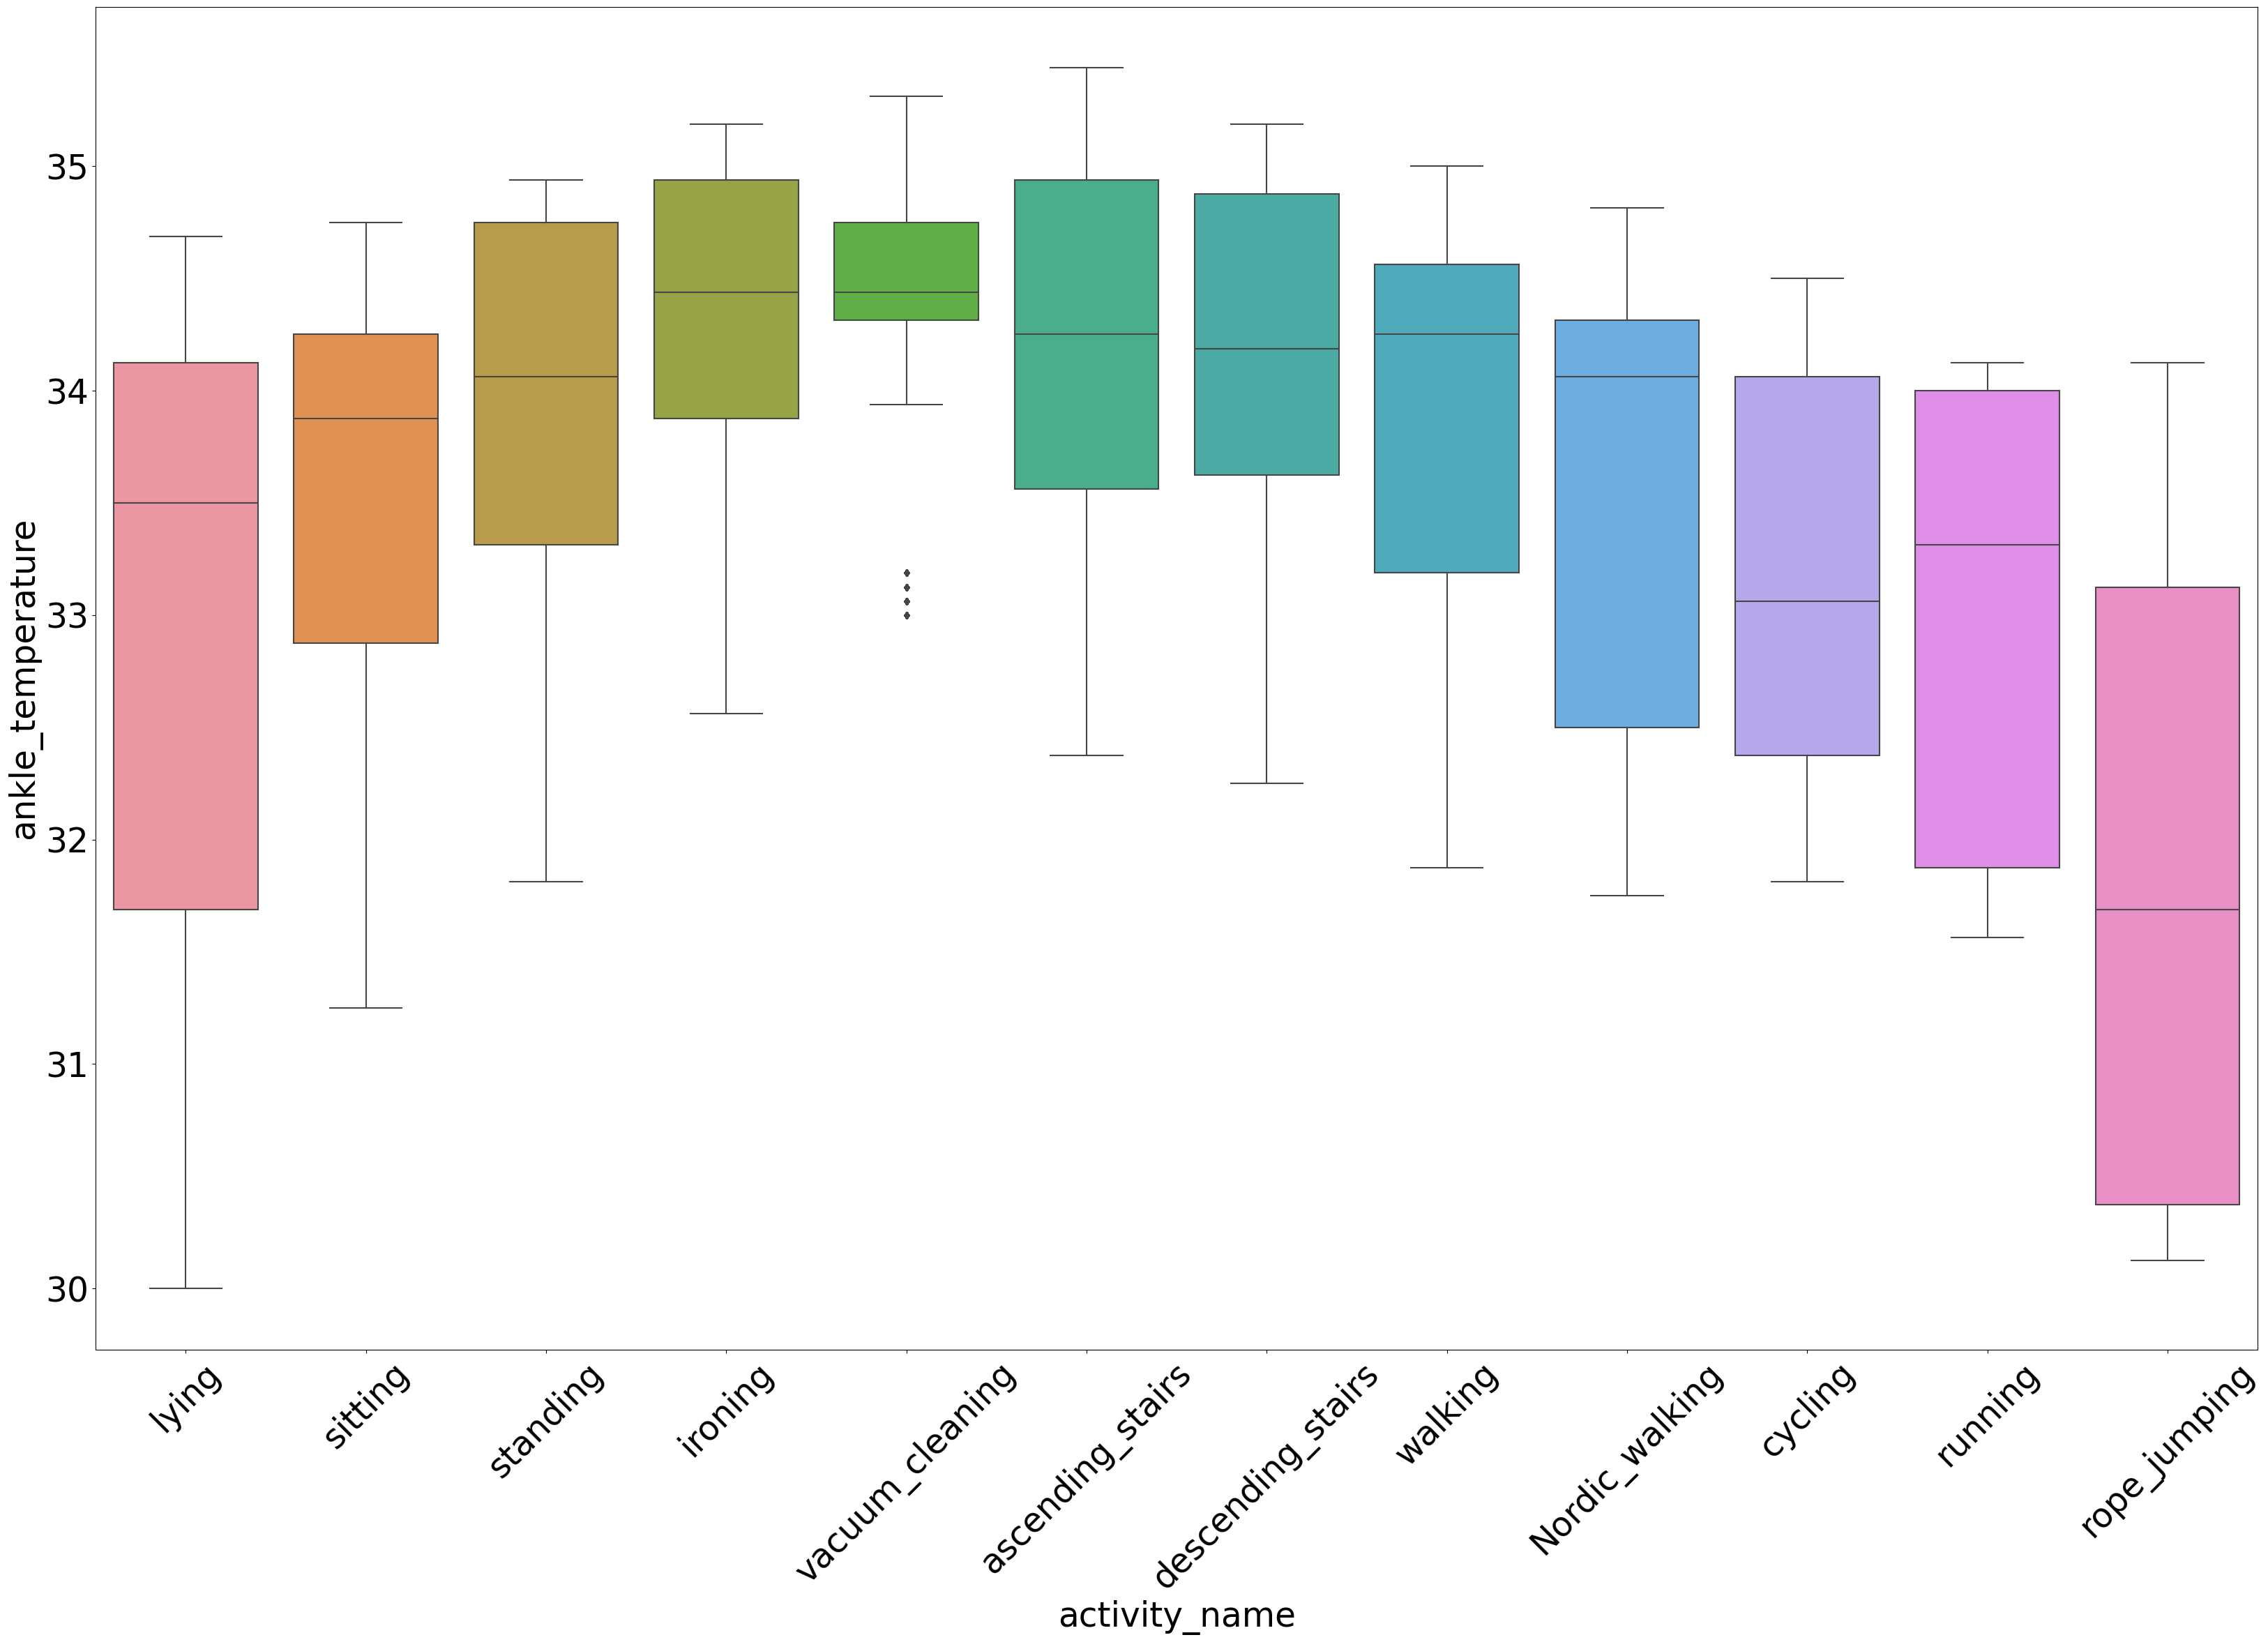

In [7]:
ax=sns.boxplot(x="activity_name",y="ankle_temperature",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating Text
plt.show()

1. Interestingly, we see that "ankle_temperature" might be lower on average while lying.<br>
2. Outliers are mostly present in "rope_jumping" and "vacuum_cleaning" on the lower side. 

* Boxplot of chest temperature grouped by activity.

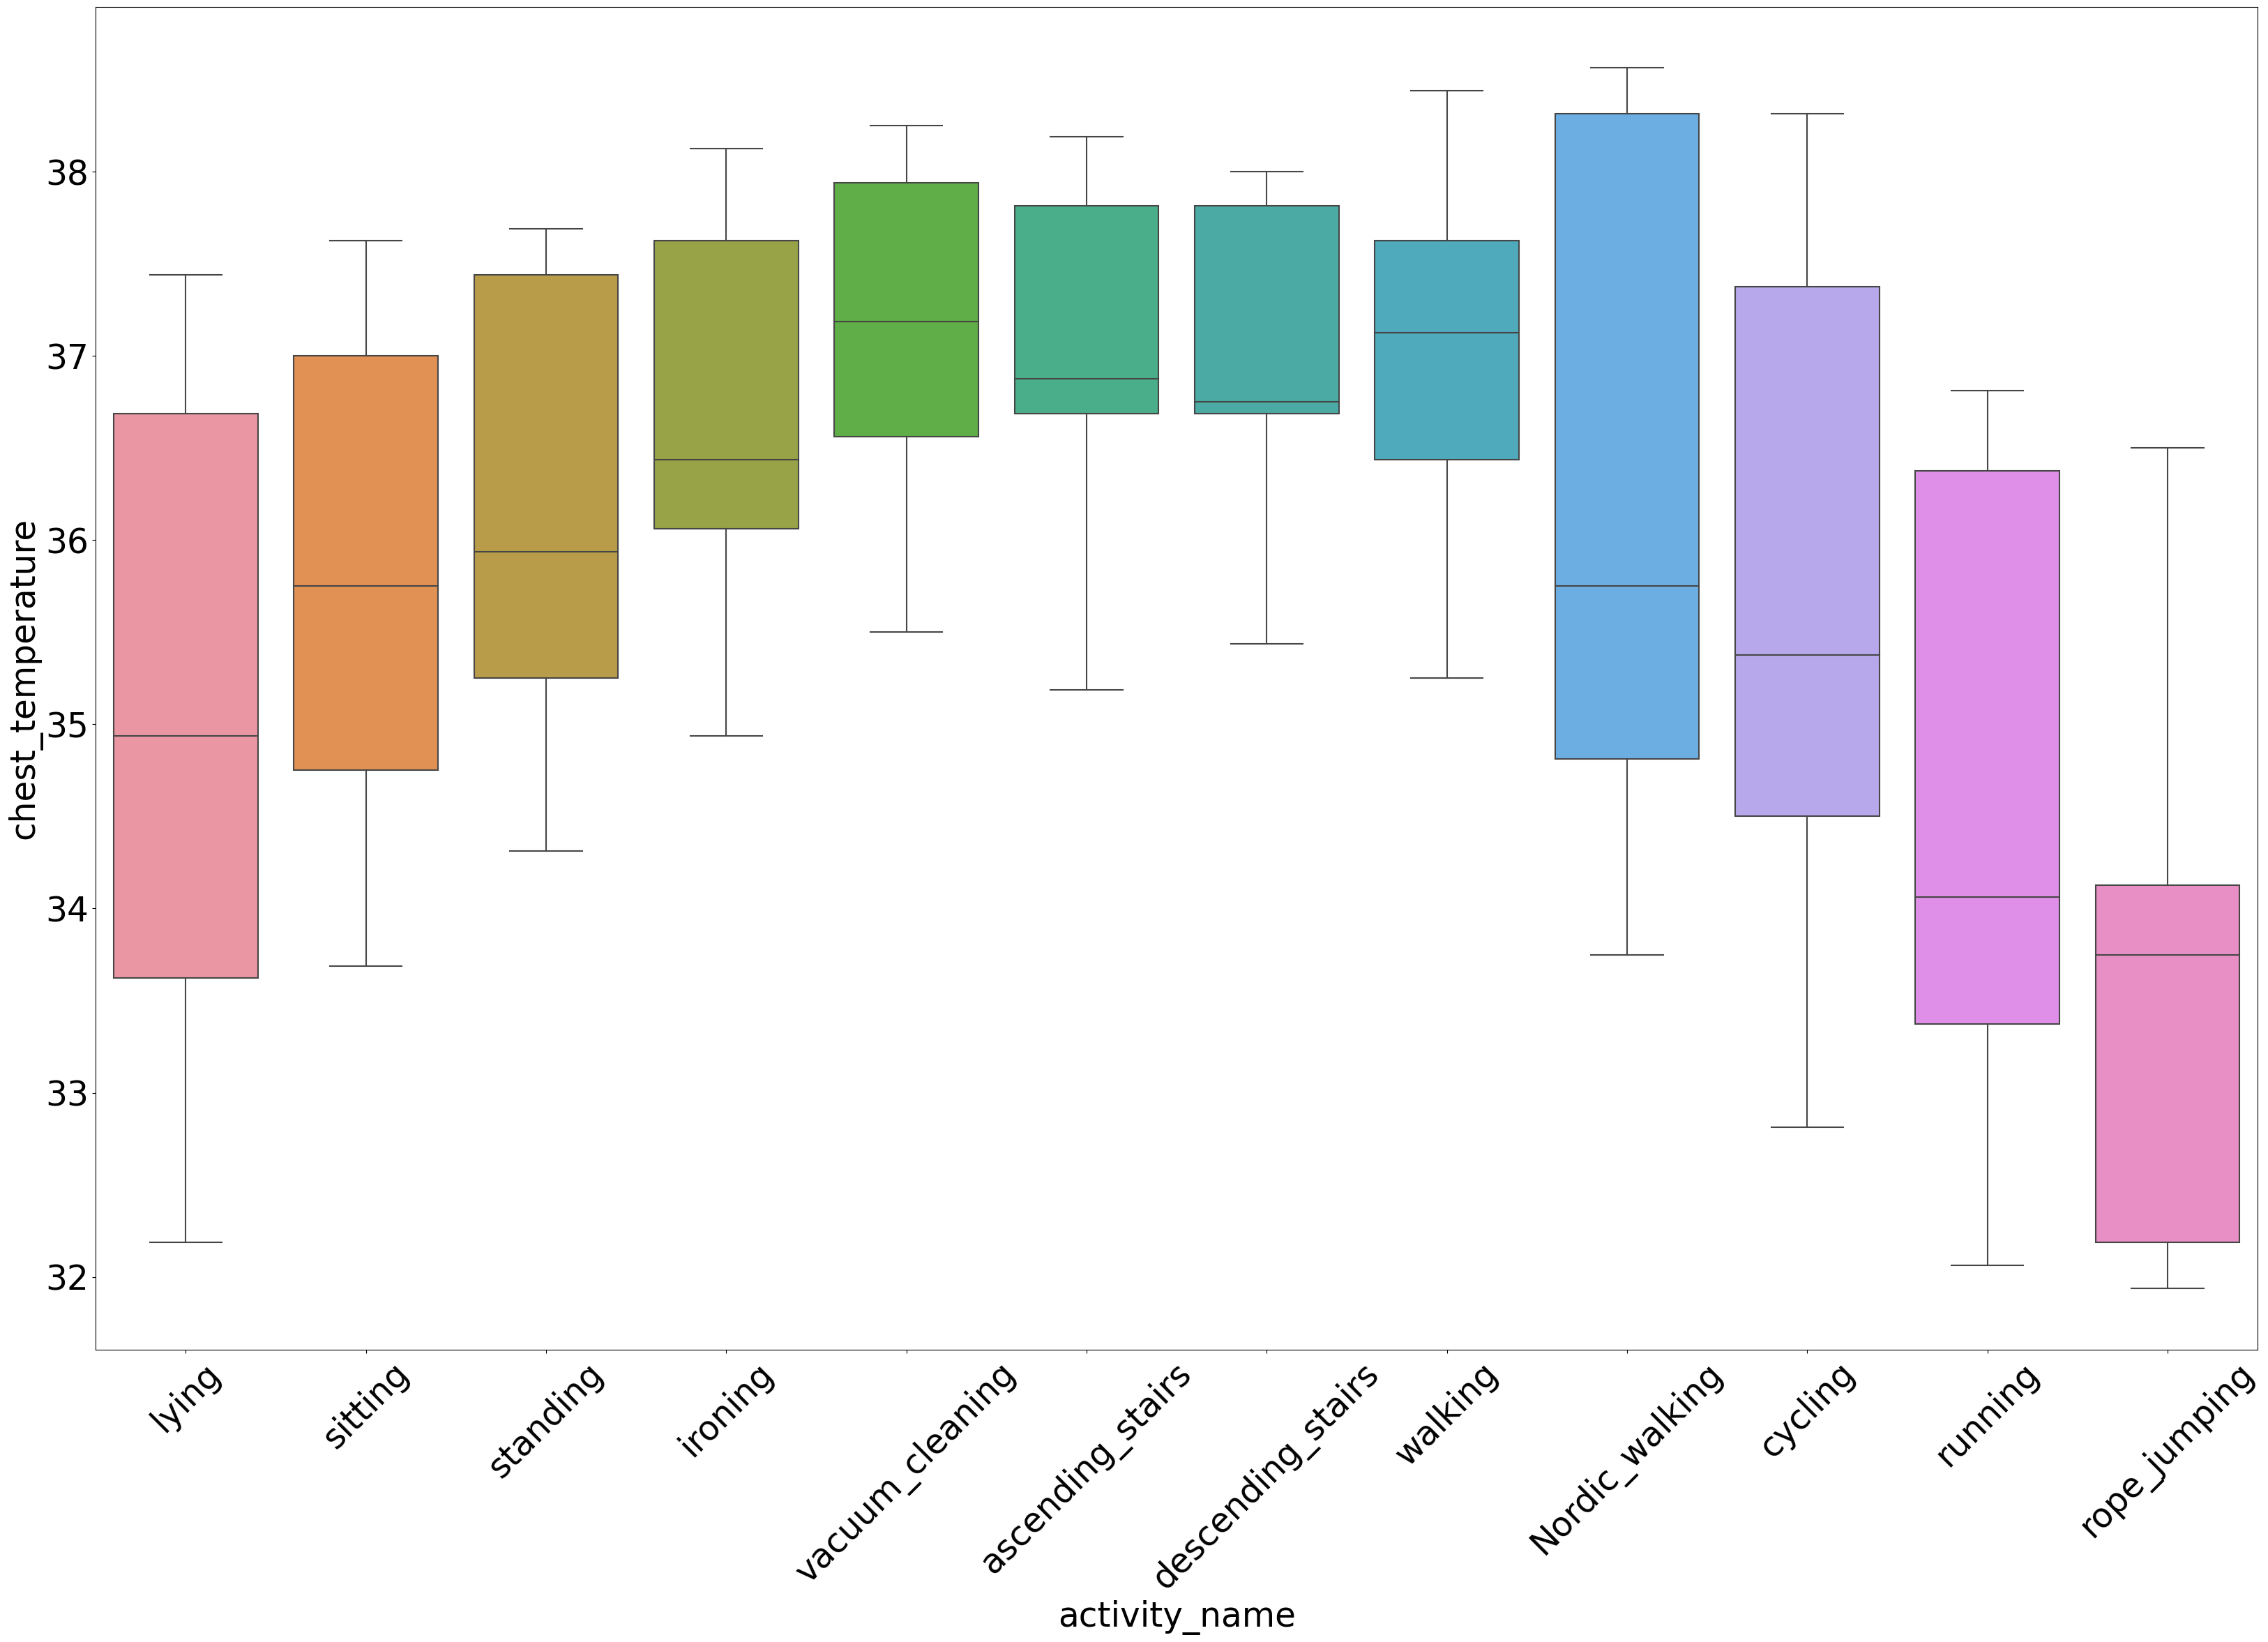

In [8]:
ax=sns.boxplot(x="activity_name",y="chest_temperature",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating Text
plt.show()

1. Just like ankle temperature, the mean of chest temperature seems to be lower while lying  <br>
   and even "running" seems to have lower average, although the data is more widely distributed and positively skewed.<br>
2. The outliers are only present in "lying" and they are on the higher side.

* A joint plot trying to investigate possibility of correlation between heart rate <br>
  and chest temperature.

<Figure size 4000x2500 with 0 Axes>

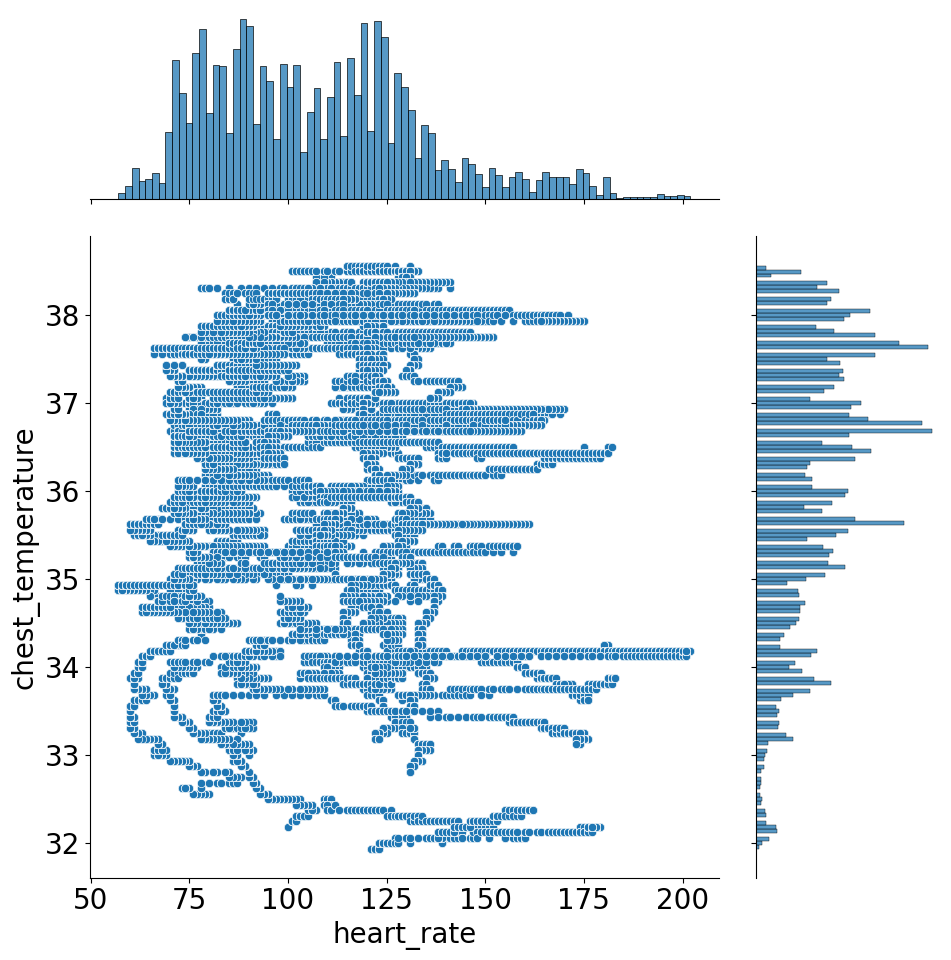

In [9]:
plt.clf()
rcParams['font.size'] = 20 # Setting the text and number font size
g = sns.JointGrid(data=train, x="heart_rate", y="chest_temperature",
                  height=10,ratio=3)
g.plot_joint(sns.scatterplot,palette='colorblind')
g.plot_marginals(sns.histplot)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating Text
plt.show()

1. From the scatter plot, we see that there does not seem to be a correlation between<br>
   the two variables.<br>
2. The respective histograms indicate that both the features considered have <br>
   a multi-modal distribution.

### Decriptive Statistics<br>
Mean of heart rate and temperatures for each activity

In [10]:
display(train.groupby(by='activity_name')[['heart_rate','chest_temperature','hand_temperature',
    'ankle_temperature']].mean())
discard = ['activity_id','activity','time_stamp','id']# Columns to exclude from descriptive statistics

heart_rate  chest_temperature  hand_temperature  \
activity_name                                                        
Nordic_walking     123.827084          36.171043         31.557345   
ascending_stairs   129.485381          37.057072         33.528622   
cycling            124.878982          35.726554         31.008302   
descending_stairs  129.098939          37.025496         33.324637   
ironing             90.089527          36.664117         34.019956   
lying               75.514999          35.080602         32.720413   
rope_jumping       161.507285          33.600291         29.722679   
running            156.401676          34.405594         30.842719   
sitting             79.958133          35.827195         33.265306   
standing            88.527143          36.163437         33.636116   
vacuum_cleaning    104.257290          37.057870         34.177809   
walking            112.799377          37.007937         32.299234   

                   ankle_temperature  
activity_name                         
Nordic_walking             33.447741  
ascending_stairs           34.173008  
cycling                    33.172829  
descending_stairs          34.169952  
ironing                    34.278671  
lying                      32.972697  
rope_jumping               32.034221  
running                    33.134706  
sitting                    33.640839  
standing                   33.893689  
vacuum_cleaning            34.449081  
walking                    33.849369

Creating table with only relevant columns

In [11]:
train_trimmed = train[[i for i in train.columns if i not in discard]]

Descriptive info of relevant feature

In [12]:
display(train_trimmed.describe())

heart_rate  hand_temperature  hand_3D_acceleration_16_x  \
count  88420.000000     965543.000000              965543.000000   
mean     107.429801         32.758093                  -4.932524   
std       26.982265          1.790902                   6.229351   
min       57.000000         24.875000                -145.367000   
25%       86.000000         31.687500                  -8.954925   
50%      104.000000         33.187500                  -5.424830   
75%      124.000000         34.062500                  -0.936260   
max      202.000000         35.500000                  62.859600   

       hand_3D_acceleration_16_y  hand_3D_acceleration_16_z  \
count              965543.000000              965543.000000   
mean                    3.581740                   3.607465   
std                     6.874341                   3.958175   
min                  -100.679000                 -73.949700   
25%                     1.039540                   1.160255   
50%                     3.523040                   3.438790   
75%                     6.460925                   6.537730   
max                   155.699000                 116.977000   

       hand_3D_acceleration_6_x  hand_3D_acceleration_6_y  \
count             965543.000000             965543.000000   
mean                  -4.865283                  3.569493   
std                    6.232214                  6.577011   
min                  -61.214700                -61.834800   
25%                   -8.852590                  1.037170   
50%                   -5.351380                  3.561410   
75%                   -0.888102                  6.459895   
max                   46.211000                 62.252400   

       hand_3D_acceleration_6_z  hand_3D_gyroscope_x  hand_3D_gyroscope_y  \
count             965543.000000        965543.000000        965543.000000   
mean                   3.791417             0.001379             0.040500   
std                    3.947127             1.327307             0.955448   
min                  -61.419300           -27.804400           -10.314500   
25%                    1.362180            -0.376663            -0.222162   
50%                    3.668240            -0.006056             0.005990   
75%                    6.787690             0.332109             0.266022   
max                   61.923400            22.960000            14.133700   

       ...  ankle_3D_acceleration_16_z  ankle_3D_acceleration_6_x  \
count  ...               966842.000000              966842.000000   
mean   ...                   -2.593200                   9.379863   
std    ...                    3.946863                   6.064593   
min    ...                 -158.830000                 -61.142000   
25%    ...                   -3.811540                   8.403092   
50%    ...                   -2.419480                   9.550885   
75%    ...                   -1.045393                  10.282300   
max    ...                  158.872000                  61.950900   

       ankle_3D_acceleration_6_y  ankle_3D_acceleration_6_z  \
count              966842.000000              966842.000000   
mean                   -0.051151                  -2.174275   
std                     7.205979                   3.485692   
min                   -61.903500                 -62.314800   
25%                    -2.087300                  -3.400028   
50%                    -0.226178                  -1.992715   
75%                     1.920358                  -0.596881   
max                    62.046100                  54.028500   

       ankle_3D_gyroscope_x  ankle_3D_gyroscope_y  ankle_3D_gyroscope_z  \
count         966842.000000         966842.000000         966842.000000   
mean               0.011737             -0.036204              0.008115   
std                1.128283              0.637981              2.014168   
min              -12.396300             -7.807450            -14.019600   
25%               -

Correlation table of relevant features

In [13]:
display(train_trimmed.corr()) 

heart_rate  hand_temperature  \
heart_rate                    1.000000         -0.391453   
hand_temperature             -0.391453          1.000000   
hand_3D_acceleration_16_x    -0.301026          0.058504   
hand_3D_acceleration_16_y     0.064528         -0.051463   
hand_3D_acceleration_16_z    -0.274157          0.076407   
hand_3D_acceleration_6_x     -0.310346          0.072516   
hand_3D_acceleration_6_y      0.062416         -0.046635   
hand_3D_acceleration_6_z     -0.283370          0.092859   
hand_3D_gyroscope_x           0.013464         -0.024619   
hand_3D_gyroscope_y           0.062930         -0.026562   
hand_3D_gyroscope_z          -0.000219         -0.001390   
hand_3D_magnetometer_x        0.322092         -0.095368   
hand_3D_magnetometer_y       -0.139399         -0.023766   
hand_3D_magnetometer_z        0.109585         -0.021362   
chest_temperature            -0.122921          0.757164   
chest_3D_acceleration_16_x   -0.019398          0.006269   
chest_3D_acceleration_16_y    0.153850          0.036817   
chest_3D_acceleration_16_z   -0.412172          0.096268   
chest_3D_acceleration_6_x    -0.018032          0.019988   
chest_3D_acceleration_6_y     0.155178          0.034483   
chest_3D_acceleration_6_z    -0.416922          0.105624   
chest_3D_gyroscope_x          0.003843         -0.000619   
chest_3D_gyroscope_y          0.011949         -0.014102   
chest_3D_gyroscope_z         -0.019511          0.006864   
chest_3D_magnetometer_x      -0.159446         -0.043265   
chest_3D_magnetometer_y      -0.403852         -0.003520   
chest_3D_magnetometer_z       0.449901         -0.180622   
ankle_temperature            -0.055419          0.495732   
ankle_3D_acceleration_16_x    0.280866         -0.059958   
ankle_3D_acceleration_16_y    0.197342         -0.044497   
ankle_3D_acceleration_16_z   -0.005595         -0.040150   
ankle_3D_acceleration_6_x     0.298510         -0.058439   
ankle_3D_acceleration_6_y     0.216843         -0.049500   
ankle_3D_acceleration_6_z    -0.011111         -0.041109   
ankle_3D_gyroscope_x          0.000879          0.000473   
ankle_3D_gyroscope_y         -0.024225          0.031221   
ankle_3D_gyroscope_z          0.006975          0.002406   
ankle_3D_magnetometer_x      -0.325659          0.090688   
ankle_3D_magnetometer_y      -0.245925          0.114099   
ankle_3D_magnetometer_z      -0.056992          0.154791   

                            hand_3D_acceleration_16_x  \
heart_rate                                  -0.301026   
hand_temperature                             0.058504   
hand_3D_acceleration_16_x                    1.000000   
hand_3D_acceleration_16_y                   -0.085015   
hand_3D_acceleration_16_z                    0.259016   
hand_3D_acceleration_6_x                     0.978472   
hand_3D_acceleration_6_y                    -0.080001   
hand_3D_acceleration_6_z                     0.261356   
hand_3D_gyroscope_x                          0.019852   
hand_3D_gyroscope_y                         -0.095202   
hand_3D_gyroscope_z                          0.031381   
hand_3D_magnetometer_x                      -0.508019   
hand_3D_magnetometer_y                       0.056861   
hand_3D_magnetometer_z                      -0.210626   
chest_temperature                           -0.160733   
chest_3D_acceleration_16_x                   0.022957   
chest_3D_acceleration_16_y                  -0.422728   
chest_3D_acceleration_16_z                   0.437725   
chest_3D_acceleration_6_x                    0.021877   
chest_3D_acceleration_6_y                   -0.428771   
chest_3D_acceleration_6_z                    0.437469   
chest_3D_gyroscope_x                        -0.070307   
chest_3D_gyroscope_y                        -0.047881   
chest_3D_gyroscope_z                         0.080080   
chest_3D_magnetometer_x                      0.250043   
chest_3D_magnetometer_y                      0.341443   
chest_3D_magnetometer_z     

## Hypothesis Testing  

Based on the exploratory data analysis carried out, the following hypotheses are tested on  <br>
the test set:<br>
- Hand temperature is higher during 'ironing' and 'vacuum_cleaning' compared<br>
  to other activities.<br>
- Ankle temperature is lower than other activities while lying.<br>
- Chest temperature is lower while lying compared to other activities. 

Based on the EDA  we performed, it does not seem that the data is normally distributed. It is <br>
for this reason that Wilcoxon rank sum test was used to test the above hypothesis instead of the usual t-test which assumes that the samples follow a normal distribution.<br>
We test the above hypothesis using the confidence level of 5%.

$H_0$(Null) : The hand temperature while ironing and while doing other activities are not significantly  different.<br>
$H_1$(Alternate) : The hand temperature while ironing is likely to be higher compared to other activities.

In [14]:
test1 = test[test.activity_name=='ironing'].hand_temperature.dropna()# Hand temperature while ironing
test2 = test[test.activity_name!='ironing'].hand_temperature.dropna()# hand temperature while not ironing.Nan values dropped to get the actual size of samples.
print(ranksums(test1,test2,alternative='greater'))

RanksumsResult(statistic=272.3836095476614, pvalue=0.0)


Since we get a p-value of 0 which is lower than 0.05 we reject the null hypothesis and accept<br>
the alternate hypothesis. 

$H_0$(Null) : The hand temperature while 'vacuum_cleaning' and while doing other activities are not significantly  different.<br>
$H_1$(Alternate) : The hand temperature while 'vacuum_cleaning' is likely to be higher compared to other activities.

In [15]:
test1 = test[test.activity_name=='vacuum_cleaning'].hand_temperature.dropna()
test2 = test[test.activity_name!='vacuum_cleaning'].hand_temperature.dropna()
print(ranksums(test1,test2,alternative='greater'))

RanksumsResult(statistic=275.5265542012218, pvalue=0.0)


Since we get a p-value of 0 which is lower than 0.05 we reject the null hypothesis and accept<br>
the alternate hypothesis. 

$H_0$(Null) : The ankle temperature while lying and while doing other activities are not significantly  different.<br>
$H_1$(Alternate) : The ankle temperature while lying is likely to be lower compared to other activities.

In [16]:
test1 = test[test.activity_name=='lying'].ankle_temperature.dropna()

In [17]:
test2 = test[test.activity_name!='lying'].ankle_temperature.dropna()

In [18]:
print(ranksums(test1,test2,alternative='less'))

RanksumsResult(statistic=-168.46335442759286, pvalue=0.0)


Since we get a p-value of 0 which is lower than 0.05 we reject the null hypothesis and accept<br>
the alternate hypothesis. 

$H_0$(Null) : The chest temperature while lying and while doing other activities are not significantly  different.<br>
$H_1$(Alternate) : The chest temperature while lying is likely to be lower compared to other activities.

In [19]:
test1 = test[test.activity_name=='lying'].chest_temperature.dropna()
 
test2 = test[test.activity_name!='lying'].chest_temperature.dropna()

In [20]:
print(ranksums(test1,test2,alternative='less'))

RanksumsResult(statistic=-217.6474061014951, pvalue=0.0)


Since we get a p-value of 0 which is lower than 0.05 we reject the null hypothesis and accept<br>
the alternate hypothesis. 